In [ ]:
import matplotlib.pyplot as plt

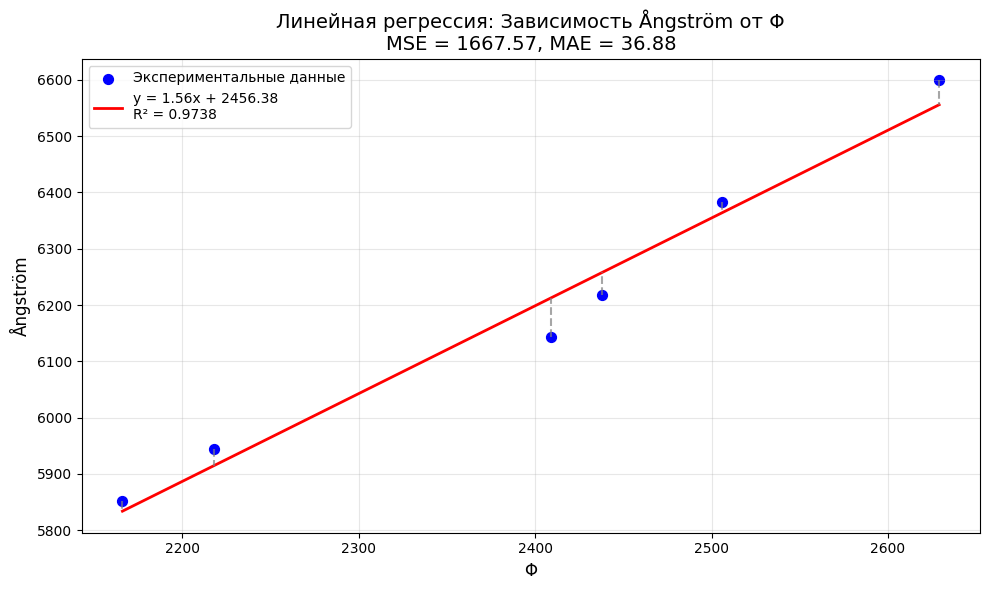

Уравнение прямой: y = 1.5593·x + 2456.3808
Среднеквадратичная ошибка (MSE) = 1667.57
Средняя абсолютная ошибка (MAE) = 36.88
Стандартная ошибка оценки = 0.1279


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
angstremm = np.array([5852, 5945, 6143, 6217, 6383, 6599])
phi = np.array([2166, 2218, 2409, 2438, 2506, 2629])

slope, intercept, r_value, p_value, std_err = stats.linregress(phi, angstremm)

phi_line = np.linspace(min(phi), max(phi), 100)
angstremm_line = slope * phi_line + intercept

plt.figure(figsize=(10, 6))
plt.scatter(phi, angstremm, color='blue', label='Экспериментальные данные', s=50)

plt.plot(phi_line, angstremm_line, color='red', linewidth=2,
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.4f}')

for i in range(len(phi)):
    y_pred = slope * phi[i] + intercept
    plt.plot([phi[i], phi[i]], [angstremm[i], y_pred],
             color='gray', linestyle='--', alpha=0.7)

y_pred_all = slope * phi + intercept
mse = np.mean((angstremm - y_pred_all)**2)
mae = np.mean(np.abs(angstremm - y_pred_all))

plt.xlabel('Φ', fontsize=12)
plt.ylabel('Ångström', fontsize=12)
plt.title('Линейная регрессия: Зависимость Ångström от Φ\n' +
          f'MSE = {mse:.2f}, MAE = {mae:.2f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Уравнение прямой: y = {slope:.4f}·x + {intercept:.4f}")
print(f"Среднеквадратичная ошибка (MSE) = {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae:.2f}")
print(f"Стандартная ошибка оценки = {std_err:.4f}")



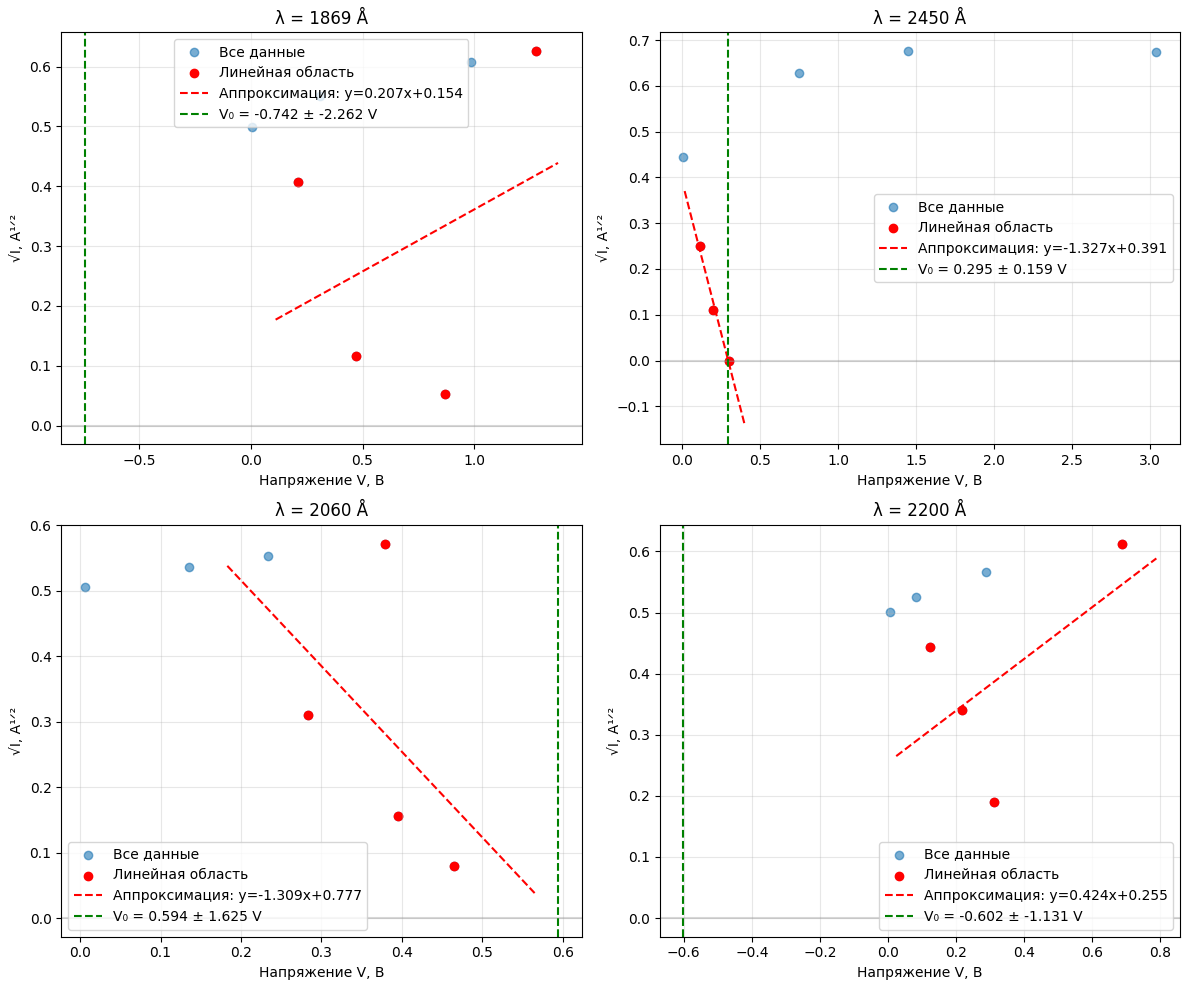

Результаты анализа:
λ (Å)	V₀ (V)	Погр. V₀	Наклон	Погр. накл.	Сдвиг	Погр. сдвига	R²
--------------------------------------------------------------------------------
1869	-0.742	-2.262	0.207	0.376	0.154	0.306	0.132
2450	0.295	0.159	-1.327	0.202	0.391	0.044	0.977
2060	0.594	1.625	-1.309	1.828	0.777	0.706	0.204
2200	-0.602	-1.131	0.424	0.411	0.255	0.163	0.347

Оценка постоянной Планка: h = -2.9870e-34 J·s
Теоретическое значение: 6.626e-34 J·s


ValueError: 'yerr' must not contain negative values

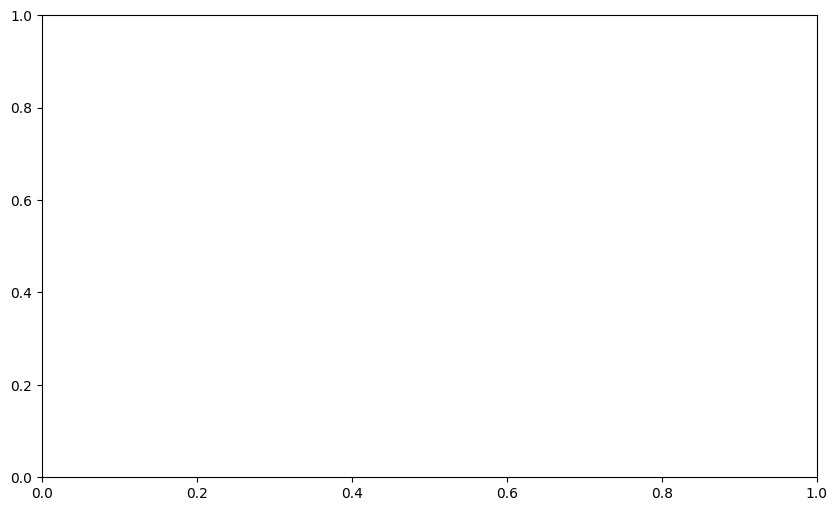

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
data = {
    1869: {
        'V': np.array([0.007, 0.309, 0.987, 1.275, 0.211, 0.471, 0.871]),
        'sqrtI': np.array([0.499, 0.551, 0.607, 0.626, 0.407, 0.116, 0.053])
    },
    2450: {
        'V': np.array([0.007, 0.752, 1.448, 3.039, 0.116, 0.195, 0.302]),
        'sqrtI': np.array([0.445, 0.628, 0.676, 0.675, 0.250, 0.111, 0.000])
    },
    2060: {
        'V': np.array([0.006, 0.135, 0.234, 0.379, 0.283, 0.395, 0.465]),
        'sqrtI': np.array([0.505, 0.536, 0.553, 0.572, 0.310, 0.156, 0.080])
    },
    2200: {
        'V': np.array([0.007, 0.081, 0.287, 0.688, 0.124, 0.216, 0.312]),
        'sqrtI': np.array([0.501, 0.526, 0.566, 0.613, 0.444, 0.340, 0.190])
    }
}
linear_regions = {
    1869: slice(-4, None),  # Last 4 points
    2450: slice(-3, None),  # Last 3 points
    2060: slice(-4, None),  # Last 4 points
    2200: slice(-4, None)   # Last 4 points
}

results = {}
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (wavelength, ax) in enumerate(zip(data.keys(), axes)):
    V = data[wavelength]['V']
    sqrtI = data[wavelength]['sqrtI']
    region = linear_regions[wavelength]
    V_lin = V[region]
    sqrtI_lin = sqrtI[region]


    slope, intercept, r_value, p_value, std_err = stats.linregress(V_lin, sqrtI_lin)
    V0 = -intercept / slope
    V0_err = V0 * np.sqrt((std_err/slope)**2 + (std_err/intercept)**2)

    V_fit = np.linspace(min(V_lin) - 0.1, max(V_lin) + 0.1, 100)
    sqrtI_fit = slope * V_fit + intercept

    results[wavelength] = {
        'slope': slope,
        'intercept': intercept,
        'V0': V0,
        'slope_err': std_err,
        'intercept_err': std_err * np.sqrt(np.mean(V_lin**2)),
        'V0_err': V0_err,
        'r_squared': r_value**2
    }


    ax.scatter(V, sqrtI, label='Все данные', alpha=0.6)
    ax.scatter(V_lin, sqrtI_lin, color='red', label='Линейная область')
    ax.plot(V_fit, sqrtI_fit, 'r--', label=f'Аппроксимация: y={slope:.3f}x+{intercept:.3f}')
    ax.axhline(0, color='gray', linestyle='-', alpha=0.3)
    ax.axvline(V0, color='green', linestyle='--', label=f'V₀ = {V0:.3f} ± {V0_err:.3f} V')

    ax.set_xlabel('Напряжение V, В')
    ax.set_ylabel('√I, A¹ᐟ²')
    ax.set_title(f'λ = {wavelength} Å')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("Результаты анализа:")
print("λ (Å)\tV₀ (V)\tПогр. V₀\tНаклон\tПогр. накл.\tСдвиг\tПогр. сдвига\tR²")
print("-" * 80)
for wavelength in data.keys():
    res = results[wavelength]
    print(f"{wavelength}\t{res['V0']:.3f}\t{res['V0_err']:.3f}\t"
          f"{res['slope']:.3f}\t{res['slope_err']:.3f}\t"
          f"{res['intercept']:.3f}\t{res['intercept_err']:.3f}\t"
          f"{res['r_squared']:.3f}")
wavelengths = np.array(list(data.keys()))
V0_values = np.array([results[w]['V0'] for w in wavelengths])
V0_errors = np.array([results[w]['V0_err'] for w in wavelengths])
inv_lambda = 1e10 / wavelengths
slope_planck, intercept_planck, r_planck, _, std_err_planck = stats.linregress(inv_lambda, V0_values)
h_estimated = slope_planck * 1.602e-19 / 3e8
print(f"\nОценка постоянной Планка: h = {h_estimated:.4e} J·s")
print(f"Теоретическое значение: 6.626e-34 J·s")

# Plot V0 vs 1/λ
plt.figure(figsize=(10, 6))
plt.errorbar(inv_lambda, V0_values, yerr=V0_errors, fmt='o', capsize=5, label='Экспериментальные данные')
fit_line = slope_planck * inv_lambda + intercept_planck
plt.plot(inv_lambda, fit_line, 'r--',
         label=f'Аппроксимация: V₀ = {slope_planck:.3e}·(1/λ) + {intercept_planck:.3f}\nR² = {r_planck**2:.3f}')
plt.xlabel('1/λ, m⁻¹')
plt.ylabel('Запирающее напряжение V₀, V')
plt.title('Зависимость запирающего напряжения от обратной длины волны')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

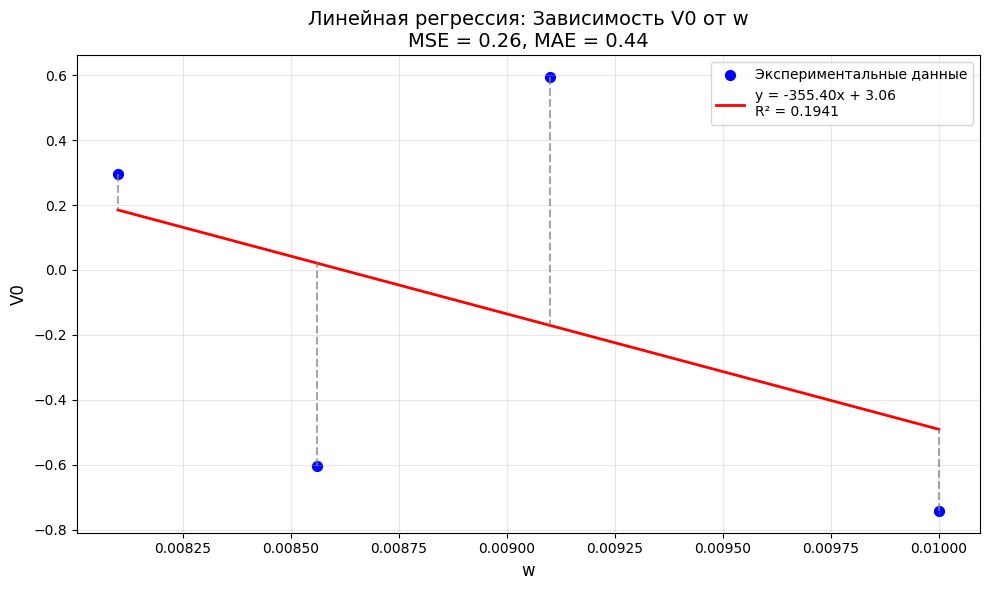

Уравнение прямой: y = -355.4022·x + 3.0635
Среднеквадратичная ошибка (MSE) = 0.26
Средняя абсолютная ошибка (MAE) = 0.44
Стандартная ошибка оценки = 512.0967


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
angstremm = np.array([-0.742, 0.295, 0.594, -0.602])
phi = np.array([0.01, 0.0081, 0.0091, 0.00856])

slope, intercept, r_value, p_value, std_err = stats.linregress(phi, angstremm)

phi_line = np.linspace(min(phi), max(phi), 100)
angstremm_line = slope * phi_line + intercept

plt.figure(figsize=(10, 6))
plt.scatter(phi, angstremm, color='blue', label='Экспериментальные данные', s=50)

plt.plot(phi_line, angstremm_line, color='red', linewidth=2,
         label=f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.4f}')

for i in range(len(phi)):
    y_pred = slope * phi[i] + intercept
    plt.plot([phi[i], phi[i]], [angstremm[i], y_pred],
             color='gray', linestyle='--', alpha=0.7)

y_pred_all = slope * phi + intercept
mse = np.mean((angstremm - y_pred_all)**2)
mae = np.mean(np.abs(angstremm - y_pred_all))

plt.xlabel('w', fontsize=12)
plt.ylabel('V0', fontsize=12)
plt.title('Линейная регрессия: Зависимость V0 от w\n' +
          f'MSE = {mse:.2f}, MAE = {mae:.2f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Уравнение прямой: y = {slope:.4f}·x + {intercept:.4f}")
print(f"Среднеквадратичная ошибка (MSE) = {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE) = {mae:.2f}")
print(f"Стандартная ошибка оценки = {std_err:.4f}")

